In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [36]:
train_df=pd.read_csv(r"C:/Users/talal/Desktop/archive/annotations.csv")
train_df

,file_name,width,height,x1,y1,x2,y2,category
0,000_0001.png,134,128,19,7,120,117,0
1,000_0002.png,165,151,23,12,149,138,0
2,000_0003.png,128,122,22,14,116,105,0
3,000_0010.png,80,73,14,8,67,63,0
4,000_0011.png,186,174,36,15,155,157,0
...,...,...,...,...,...,...,...,...
6159,056_1_0018_1_j.png,122,94,25,20,80,79,56
6160,056_1_0019_1_j.png,224,207,39,39,188,178,56
6161,056_1_0020_1_j.png,128,115,32,30,89,79,56
6162,057_1_0001_1_j.png,100,95,21,22,74,75,57


# Data Cleaning

In [37]:
train_df.isnull().sum()

file_name    0
width        0
height       0
x1           0
y1           0
x2           0
y2           0
category     0
dtype: int64

In [38]:
train_df.duplicated().sum()

0

# Discovering Data

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  6164 non-null   object
 1   width      6164 non-null   int64 
 2   height     6164 non-null   int64 
 3   x1         6164 non-null   int64 
 4   y1         6164 non-null   int64 
 5   x2         6164 non-null   int64 
 6   y2         6164 non-null   int64 
 7   category   6164 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 385.4+ KB


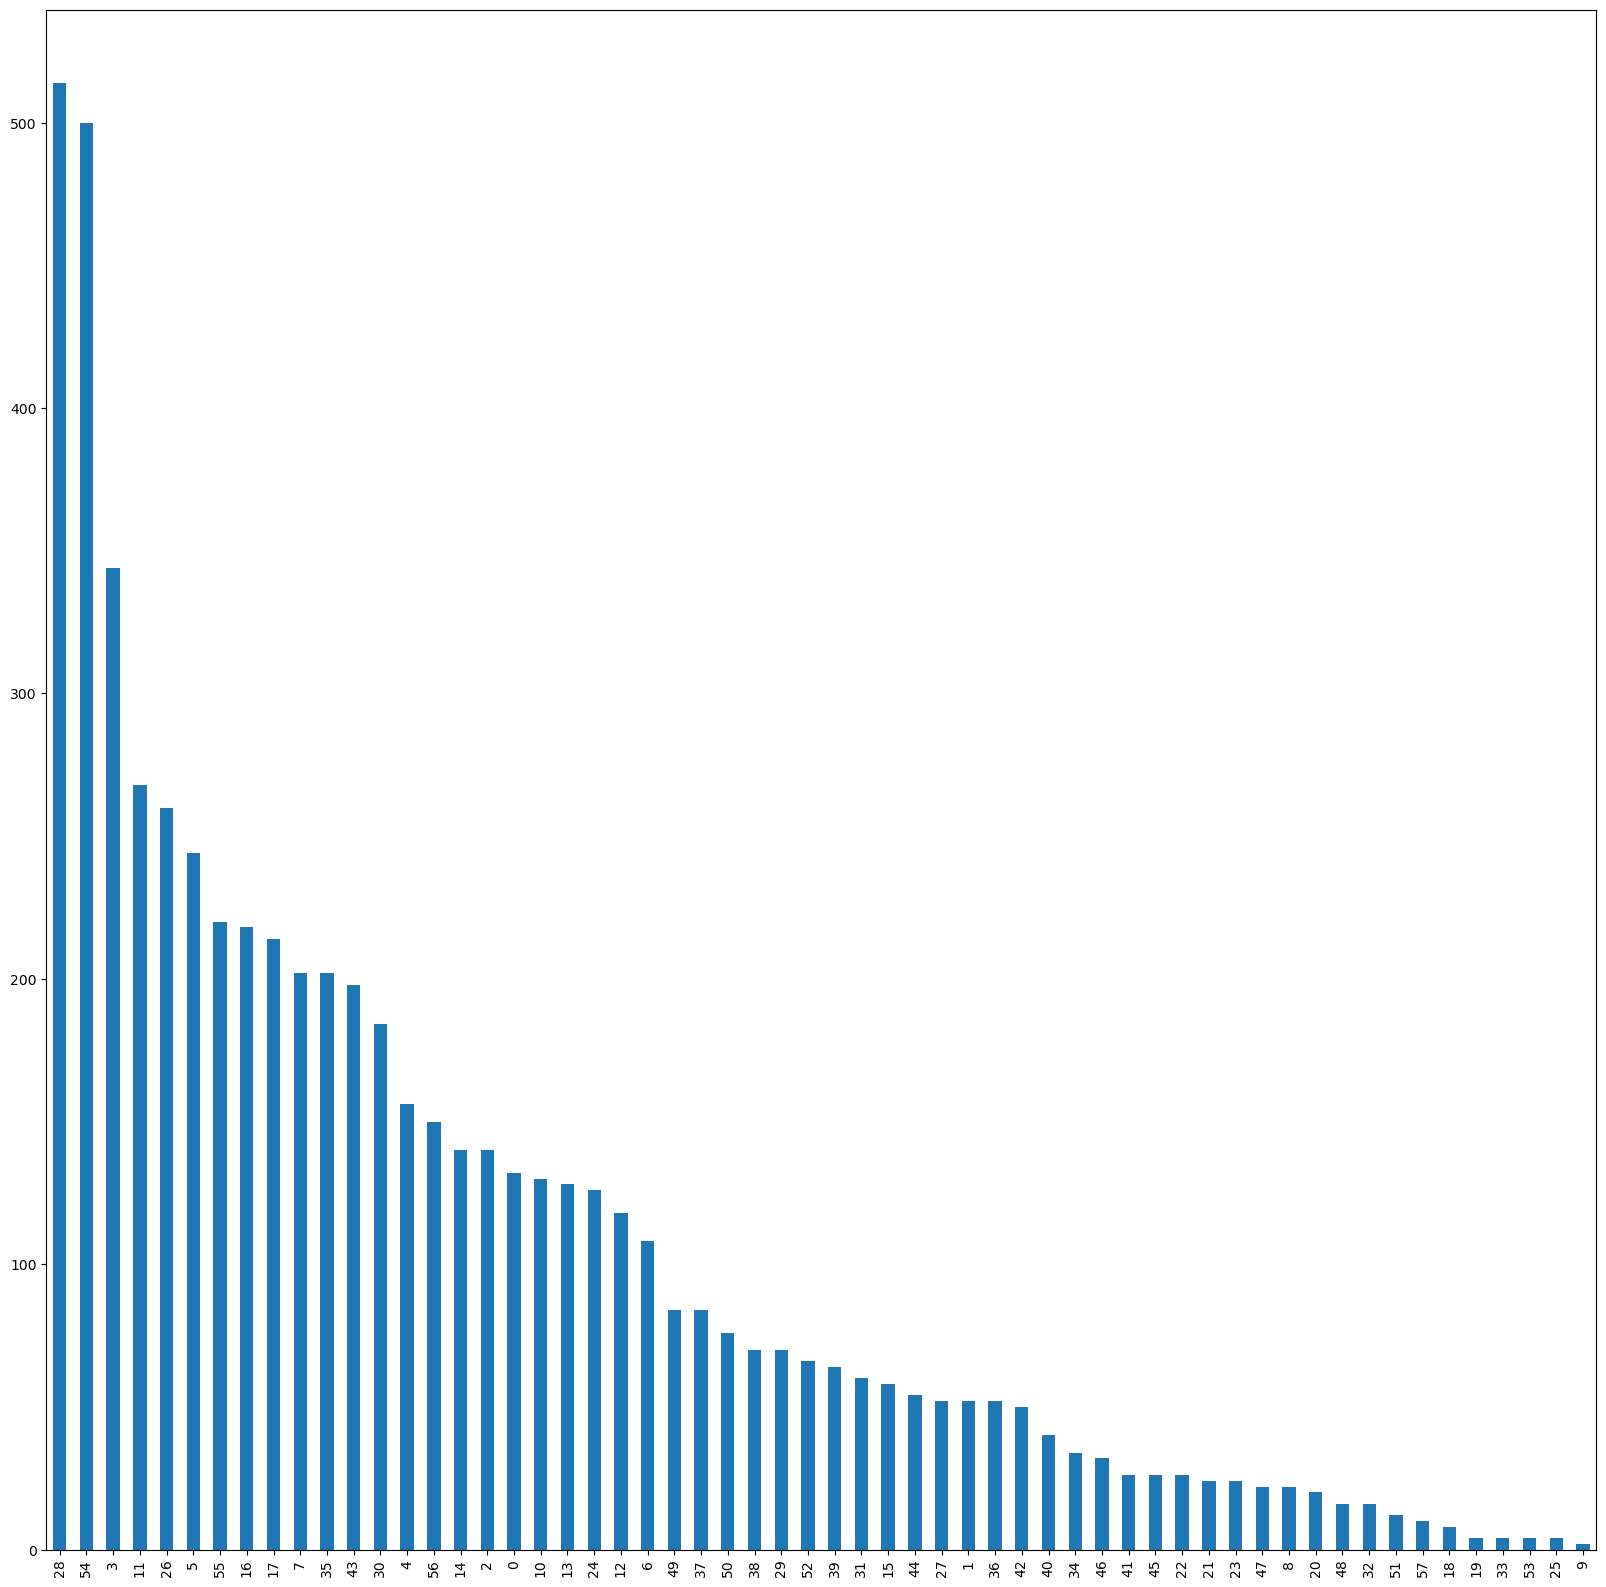

In [40]:
plt.figure(figsize=(20,20))
train_df['category'].value_counts().plot(kind='bar')
plt.show()

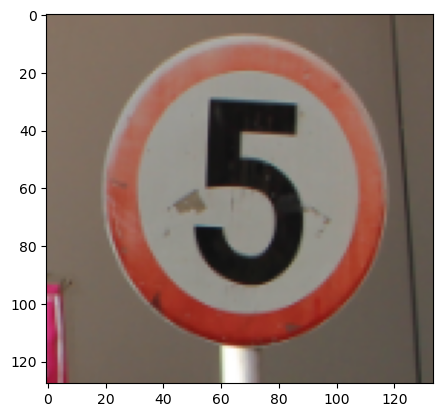

In [41]:
path=r'C:/Users/talal/Desktop/archive/images/000_0001.png'
img=plt.imread(path)
plt.imshow(img)

In [42]:
img.shape

(128, 134, 3)

# Training The Data

In [43]:
train_df['category'] = train_df['category'].astype('str')

In [44]:
from keras.applications.mobilenet_v2 import  preprocess_input

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            
            preprocessing_function=preprocess_input,
            validation_split=0.1,
            featurewise_center=False,
            featurewise_std_normalization=False,
            rotation_range=15,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True
            
            )

In [45]:
train_generator = train_datagen.flow_from_dataframe(
            dataframe=train_df,
            directory="C:/Users/talal/Desktop/archive/images",
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="training",
            batch_size=16,
            seed=42,
            shuffle=True,
            class_mode="categorical",
            target_size=(224,244))
        print('Train generator created')
        

Found 5548 validated image filenames belonging to 58 classes.
Train generator created


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


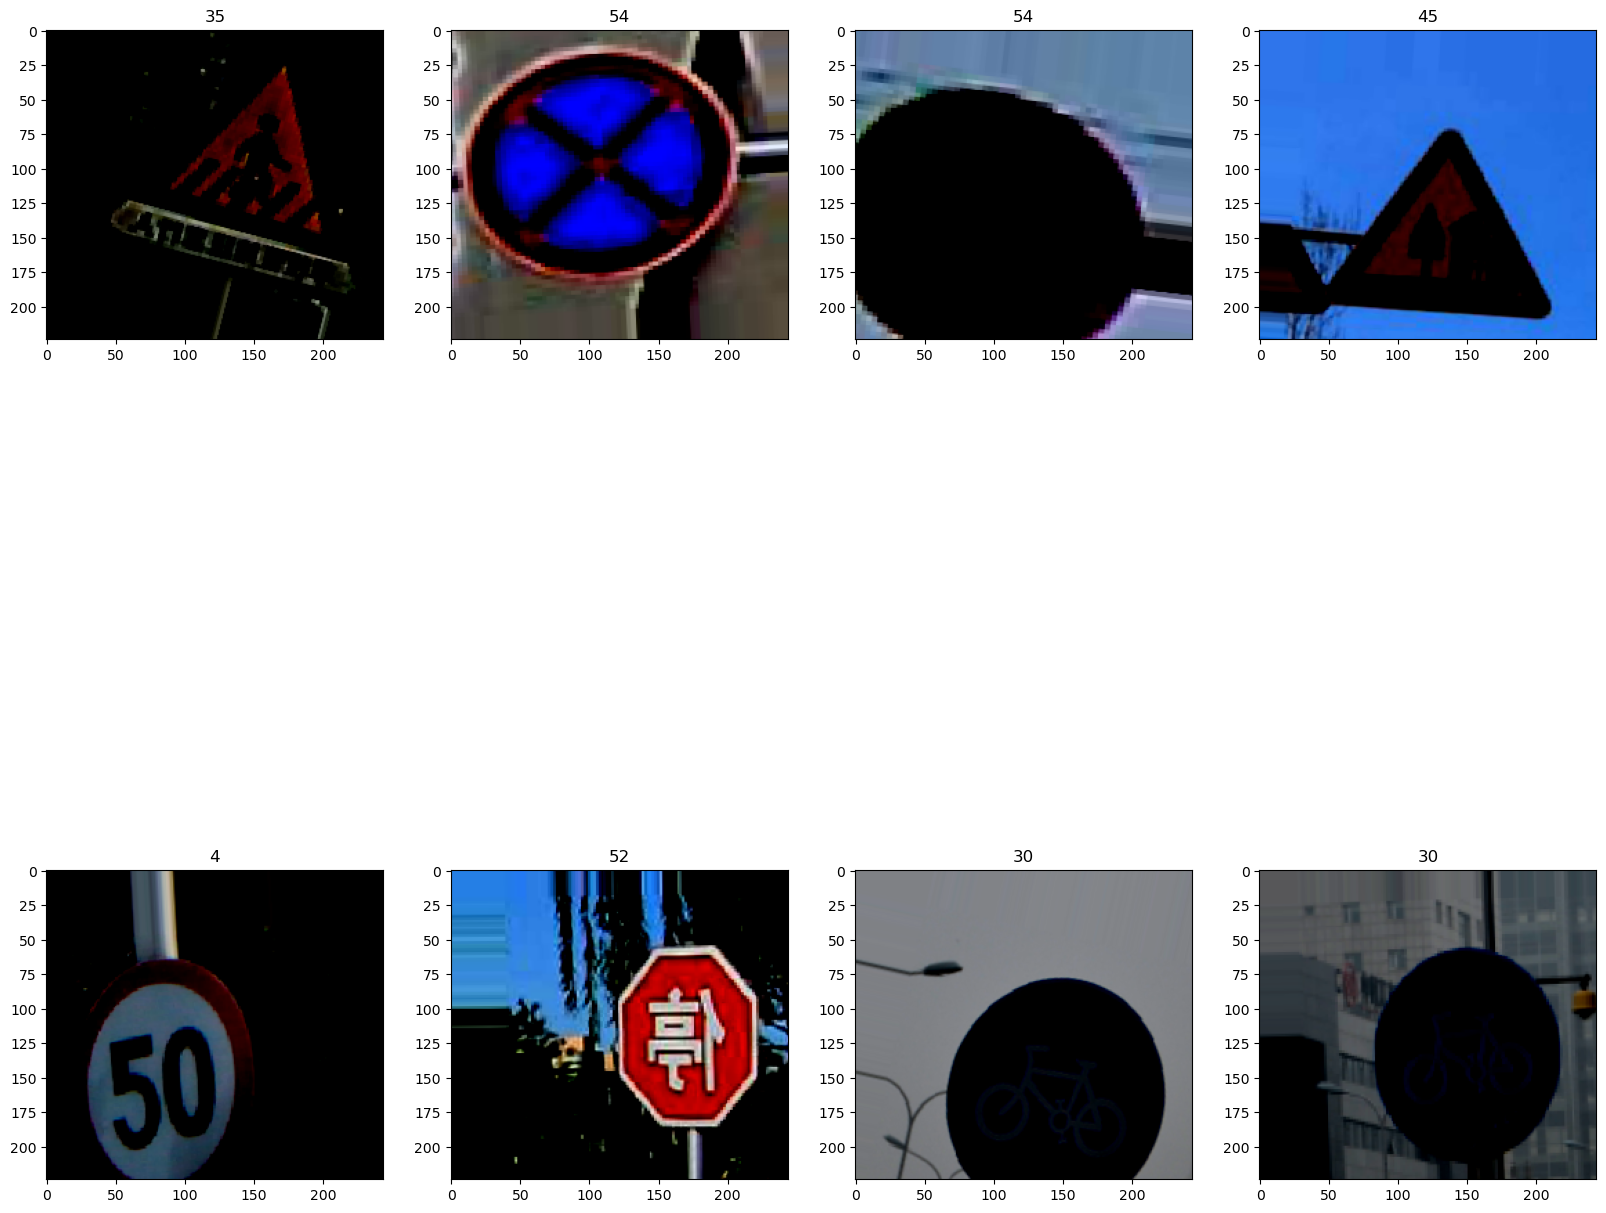

In [46]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [47]:
from keras.applications.mobilenet_v2 import  preprocess_input
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            
            preprocessing_function=preprocess_input,
            validation_split=0.1,
            
            )

In [48]:
# Validation generator
val_generator = validation_datagen.flow_from_dataframe(
            dataframe=train_df,
            directory="C:/Users/talal/Desktop/archive/images",
            x_col="file_name",
            y_col="category",
            has_ext=False,
            subset="validation",
            batch_size=16,
            seed=42,
            shuffle=False,
            class_mode="categorical",
            target_size=(224,224)) 


Found 616 validated image filenames belonging to 58 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


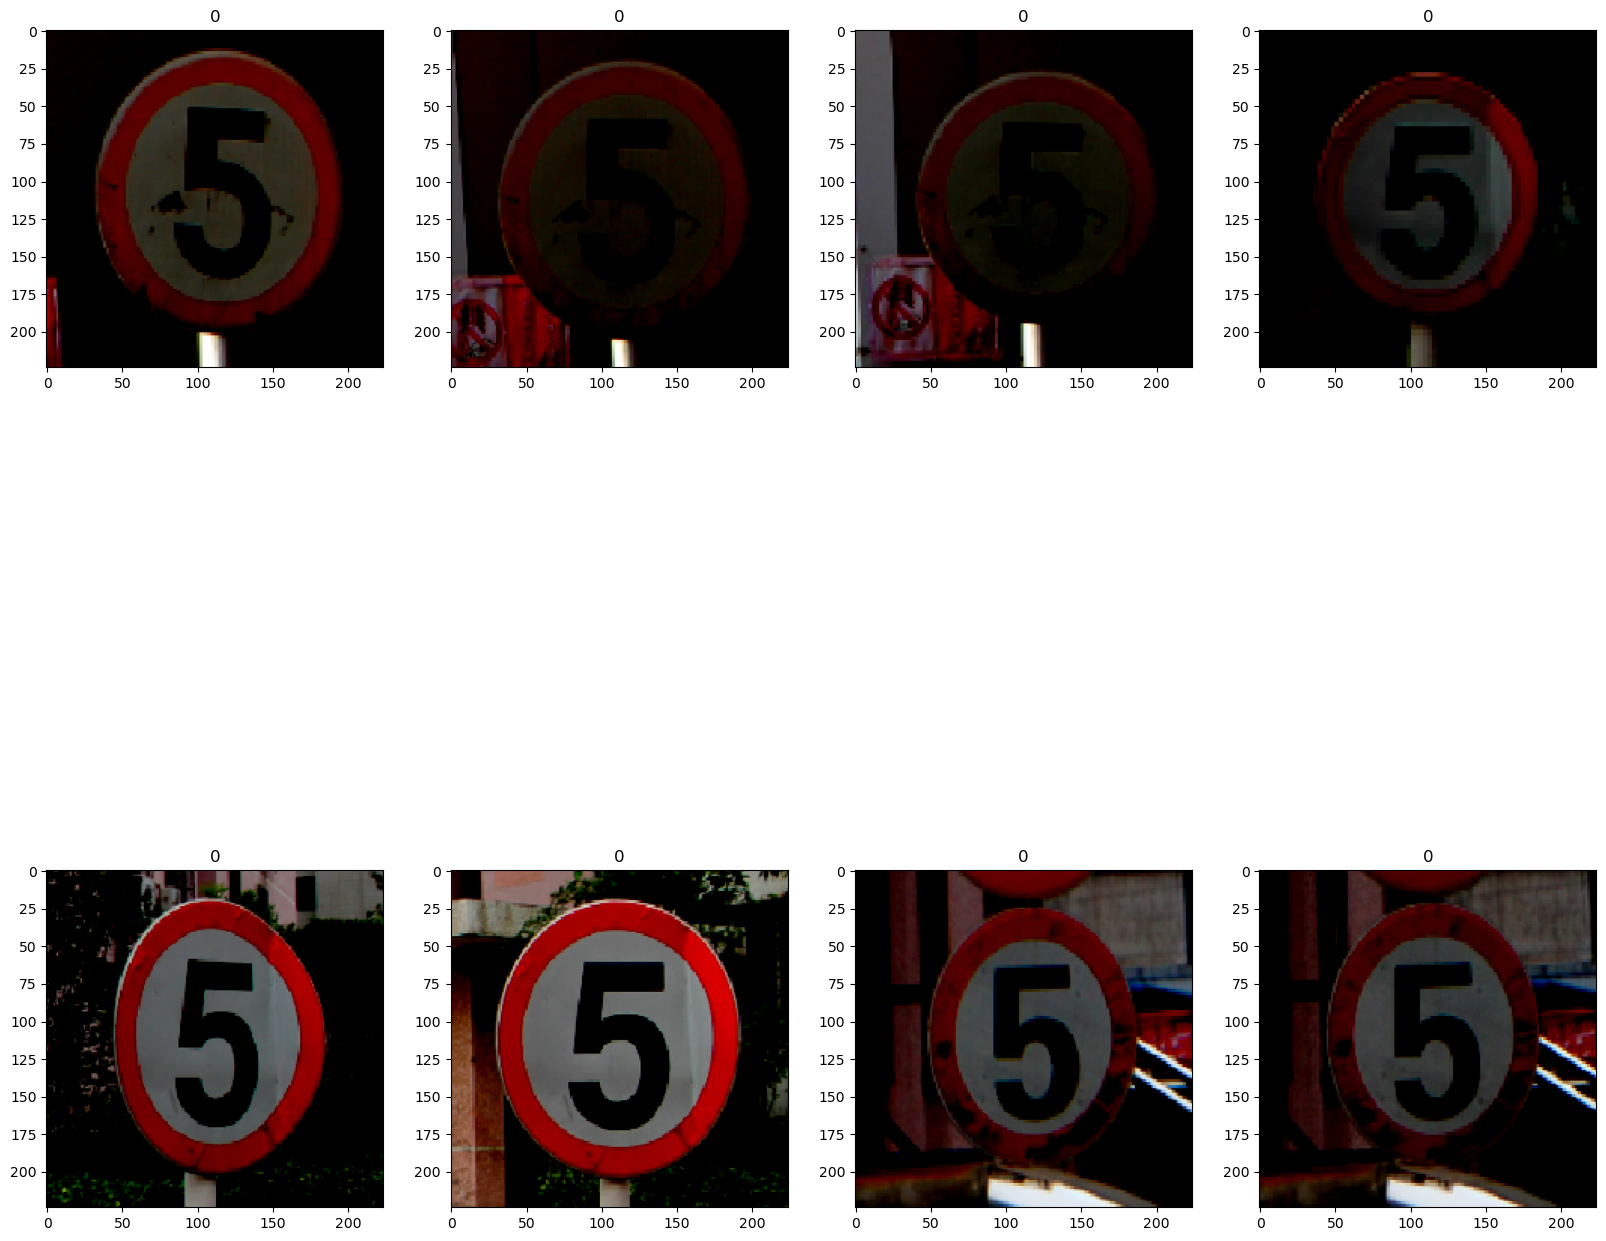

In [49]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in val_generator:
    # create a grid of 3x3 images
    for i in range(0,8):
        plt.subplot(2,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [50]:
len(classes)

58

# 1st Algorithm ( CNN )


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [52]:
optimizer=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.99)

In [53]:
EarlyStop=EarlyStopping(patience=10,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('Trafic_sign.hdf5',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [54]:
from keras.applications.mobilenet_v2 import MobileNetV2
mb=MobileNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')

In [55]:
mb.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [56]:
mb.trainable=False

In [57]:
Cnn_model = Sequential()
Cnn_model.add(mb)
Cnn_model.add(Flatten())
Cnn_model.add(Dense(units = 512 , activation = 'relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(Dense(units = 1024 , activation = 'relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(Dense(units = 512 , activation = 'relu'))
Cnn_model.add(BatchNormalization())
Cnn_model.add(Dense(units = 58 , activation = 'softmax'))

In [58]:
Cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_1 (Flatten)         (None, 62720)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               32113152  
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1024)              525312    
                                                                 
 batch_normalization_4 (Batc  (None, 1024)            

In [59]:
Cnn_model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=["accuracy"])

In [61]:
history=Cnn_model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=16,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(val_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 0.3303 - accuracy: 0.8958
Epoch 1: val_loss did not improve from 0.07797
21/21 [==============================] - 10s 447ms/step - loss: 0.3303 - accuracy: 0.8958 - val_loss: 0.1179 - val_accuracy: 0.9688 - lr: 2.5000e-04
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 0.4011 - accuracy: 0.8631
Epoch 2: val_loss did not improve from 0.07797
21/21 [==============================] - 10s 446ms/step - loss: 0.4011 - accuracy: 0.8631 - val_loss: 0.1214 - val_accuracy: 0.9375 - lr: 2.5000e-04
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 0.3043 - accuracy: 0.8929
Epoch 3: val_loss did not improve from 0.07797
21/21 [==============================] - 10s 452ms/step - loss: 0.3043 - accuracy: 0.8929 - val_loss: 0.1022 - val_accuracy: 0.9688 - lr: 2.5000e-04
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 0.3960 - accuracy: 0.8571
Epoch 4: val_loss did not improv

Epoch 28/100
21/21 [==============================] - ETA: 0s - loss: 0.1870 - accuracy: 0.9494
Epoch 28: val_loss did not improve from 0.02752
21/21 [==============================] - 9s 434ms/step - loss: 0.1870 - accuracy: 0.9494 - val_loss: 0.0578 - val_accuracy: 0.9688 - lr: 6.2500e-05
Epoch 29/100
21/21 [==============================] - ETA: 0s - loss: 0.1602 - accuracy: 0.9464
Epoch 29: val_loss did not improve from 0.02752
21/21 [==============================] - 9s 427ms/step - loss: 0.1602 - accuracy: 0.9464 - val_loss: 0.0482 - val_accuracy: 0.9688 - lr: 6.2500e-05
Epoch 30/100
21/21 [==============================] - ETA: 0s - loss: 0.1567 - accuracy: 0.9524
Epoch 30: val_loss did not improve from 0.02752
21/21 [==============================] - 9s 437ms/step - loss: 0.1567 - accuracy: 0.9524 - val_loss: 0.0616 - val_accuracy: 0.9688 - lr: 6.2500e-05
Epoch 31/100
21/21 [==============================] - ETA: 0s - loss: 0.1351 - accuracy: 0.9643
Epoch 31: val_loss did not i

In [62]:
Cnn_loss,Cnn_acc=Cnn_model.evaluate(val_generator)
print("CNN Validation:", Cnn_loss, Cnn_acc)

39/39 [==============================] - 7s 173ms/step - loss: 0.2271 - accuracy: 0.9351
CNN Validation: 0.22705957293510437 0.9350649118423462


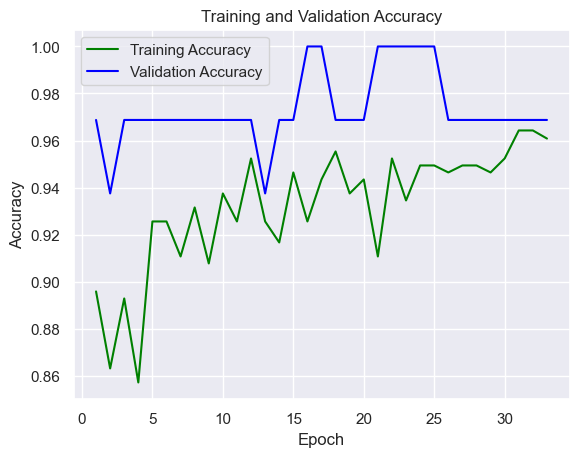

<Figure size 640x480 with 0 Axes>

In [63]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()
plt.show()

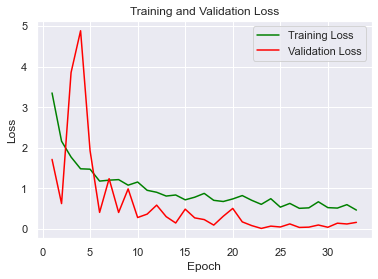

In [117]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

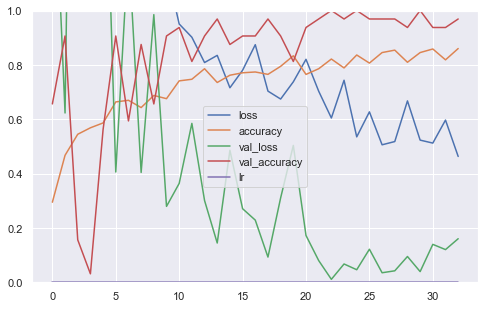

In [118]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
predictions = Cnn_model.predict(val_generator)

39/39 [==============================] - 7s 168ms/step


In [65]:
predictions[:5]

array([[9.99786198e-01, 1.47423532e-04, 7.10966731e-07, 1.65741421e-05,
        1.24040316e-08, 1.58998134e-07, 1.90653066e-06, 8.17019270e-07,
        2.37734881e-07, 5.00269763e-08, 3.79890208e-09, 2.97131777e-07,
        1.62343284e-07, 3.35276851e-09, 5.91485687e-08, 4.14156389e-08,
        3.17670121e-08, 1.83931149e-07, 1.37978748e-08, 8.10423451e-10,
        6.79085843e-10, 2.76770296e-09, 1.39371332e-08, 5.72446197e-08,
        1.07427269e-07, 2.90406263e-07, 1.39038065e-07, 1.07203493e-06,
        1.77304127e-08, 6.30822672e-10, 1.81445699e-07, 4.26907008e-07,
        9.20944121e-09, 6.69327305e-09, 8.63759453e-07, 4.53139428e-08,
        7.70604203e-09, 5.94308904e-06, 1.84731178e-07, 1.82732367e-06,
        1.97616870e-07, 1.40582097e-08, 1.02880563e-07, 4.23387903e-08,
        2.92835296e-07, 2.36752257e-07, 3.02520919e-09, 7.14448106e-07,
        2.52494078e-06, 3.29533373e-06, 7.17985782e-10, 1.47255250e-07,
        1.16314877e-05, 1.22376259e-05, 2.05602851e-06, 2.879993

In [66]:
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.79      1.00      0.88        15
           2       0.40      1.00      0.57         4
           3       1.00      0.80      0.89        10
           4       1.00      1.00      1.00        30
           5       1.00      0.64      0.78        11
           6       0.93      1.00      0.96        40
           7       1.00      1.00      1.00         7
           8       0.94      1.00      0.97        16
           9       1.00      0.90      0.95        40
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         2
          12       0.94      0.94      0.94        32
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         4
          17       1.00    

C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_cla

<AxesSubplot:>

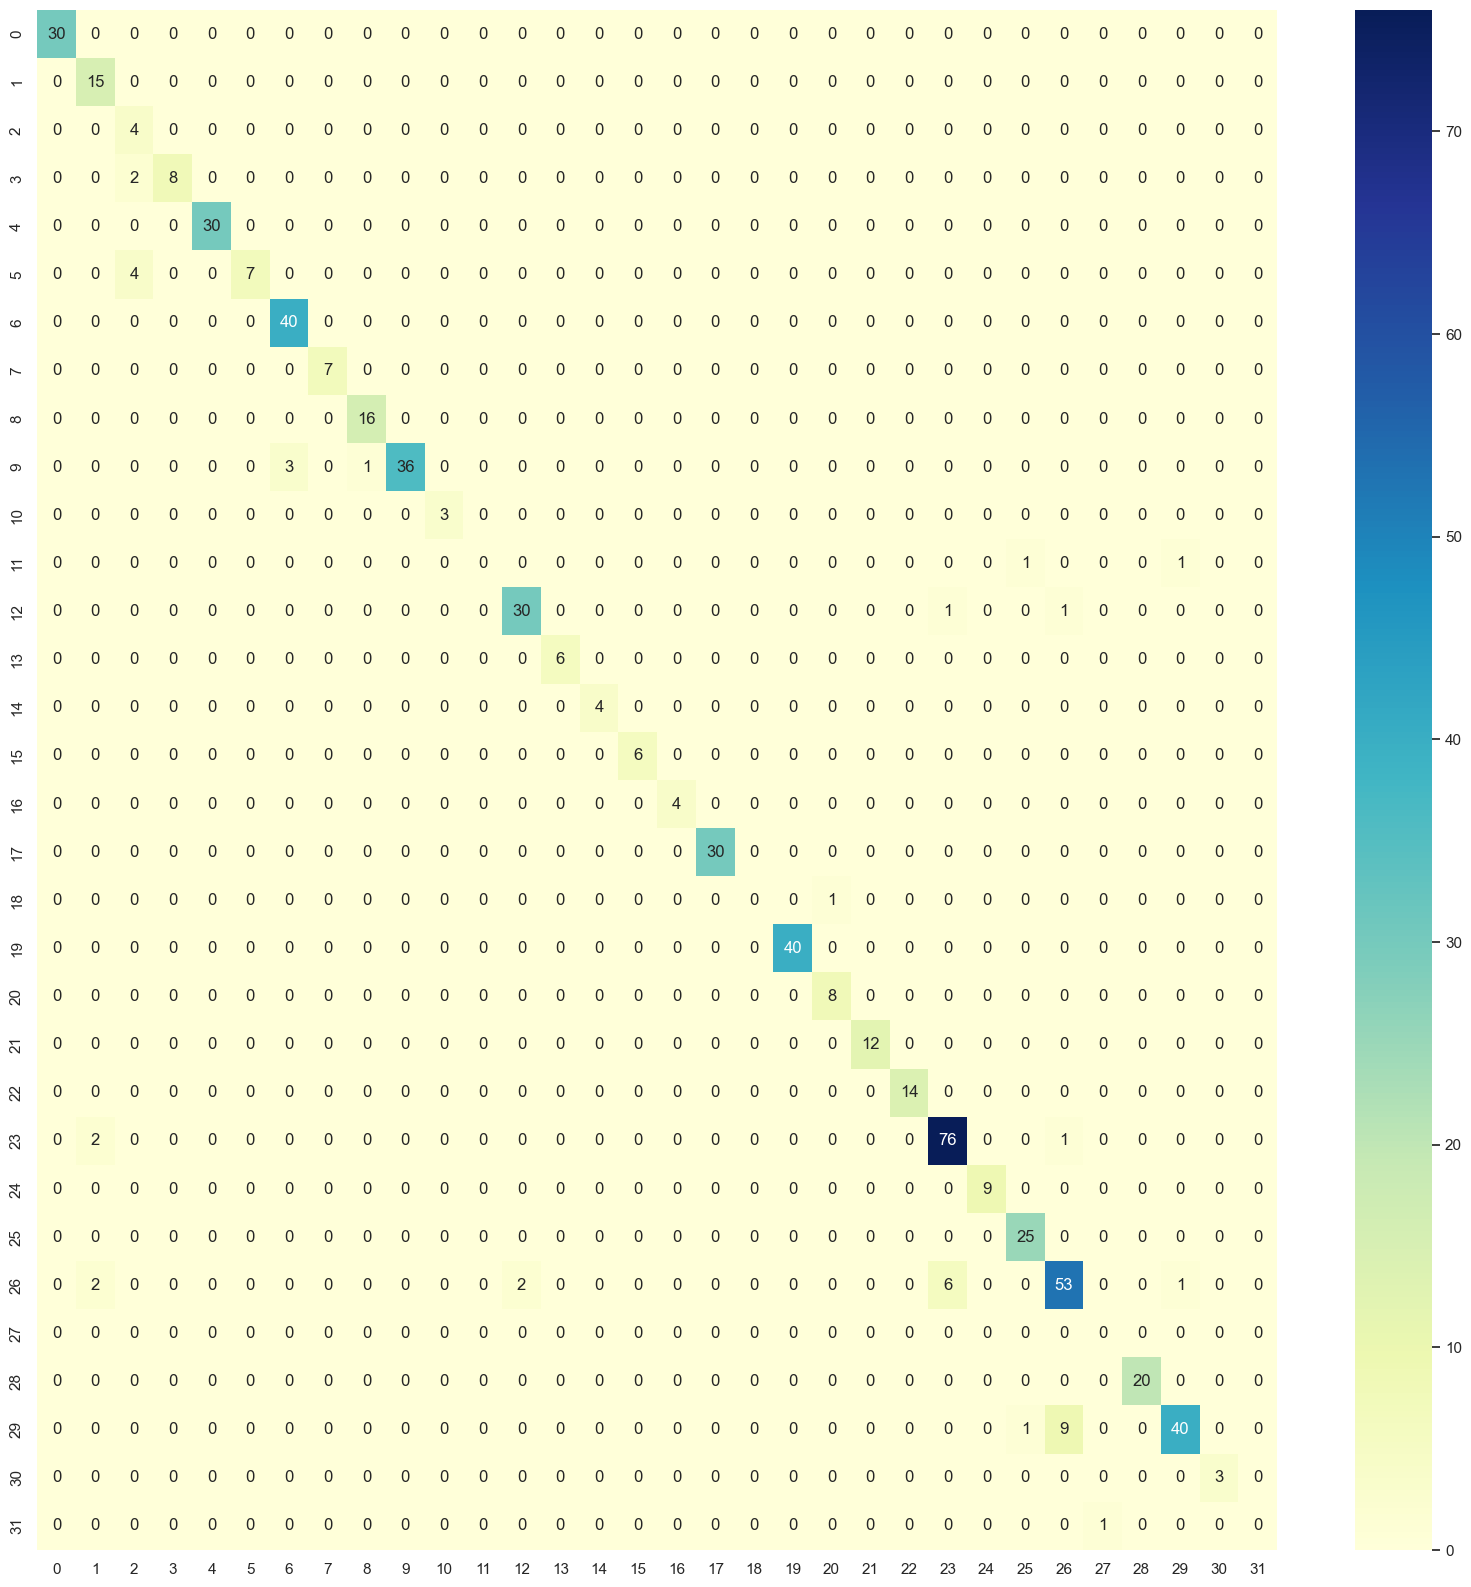

In [67]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

# 2nd Algorithm ( ANN )

In [68]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

# Load the MobileNetV2 model without the top (fully connected) layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Add your own fully connected layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(58, activation='softmax')(x)  # Modify `num_classes` according to your task

# Create the ANN model
Ann_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
Ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
Ann_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [70]:
history2=Ann_model.fit(train_generator,validation_data=val_generator,epochs=100,batch_size=16,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(val_generator)//16,
                  callbacks=callback, verbose=1)

Epoch 1/100
21/21 [==============================] - ETA: 0s - loss: 3.2967 - accuracy: 0.2708
Epoch 1: val_loss did not improve from 0.02752
21/21 [==============================] - 8s 310ms/step - loss: 3.2967 - accuracy: 0.2708 - val_loss: 2.0094 - val_accuracy: 0.7500 - lr: 0.0010
Epoch 2/100
21/21 [==============================] - ETA: 0s - loss: 1.9155 - accuracy: 0.5241
Epoch 2: val_loss did not improve from 0.02752
21/21 [==============================] - 6s 266ms/step - loss: 1.9155 - accuracy: 0.5241 - val_loss: 3.5594 - val_accuracy: 0.1250 - lr: 0.0010
Epoch 3/100
21/21 [==============================] - ETA: 0s - loss: 1.6586 - accuracy: 0.5982
Epoch 3: val_loss did not improve from 0.02752
21/21 [==============================] - 6s 273ms/step - loss: 1.6586 - accuracy: 0.5982 - val_loss: 2.1645 - val_accuracy: 0.3125 - lr: 0.0010
Epoch 4/100
21/21 [==============================] - ETA: 0s - loss: 1.3200 - accuracy: 0.6488
Epoch 4: val_loss did not improve from 0.02752


In [71]:
predictions = Ann_model.predict(val_generator)

39/39 [==============================] - 7s 169ms/step


In [73]:
from sklearn.metrics import classification_report
print(classification_report(val_generator.classes, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       1.00      0.87      0.93        15
           2       0.60      0.75      0.67         4
           3       1.00      0.20      0.33        10
           4       1.00      1.00      1.00        30
           5       0.73      0.73      0.73        11
           6       1.00      0.78      0.87        40
           7       0.29      1.00      0.45         7
           8       1.00      0.94      0.97        16
           9       0.83      1.00      0.91        40
          10       1.00      0.33      0.50         3
          11       0.00      0.00      0.00         2
          12       0.49      0.84      0.62        32
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         4
          15       1.00      1.00      1.00         6
          16       1.00      0.50      0.67         4
          17       0.77    

C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\talal\anaconda3\lib\site-packages\sklearn\metrics\_cla

<AxesSubplot:>

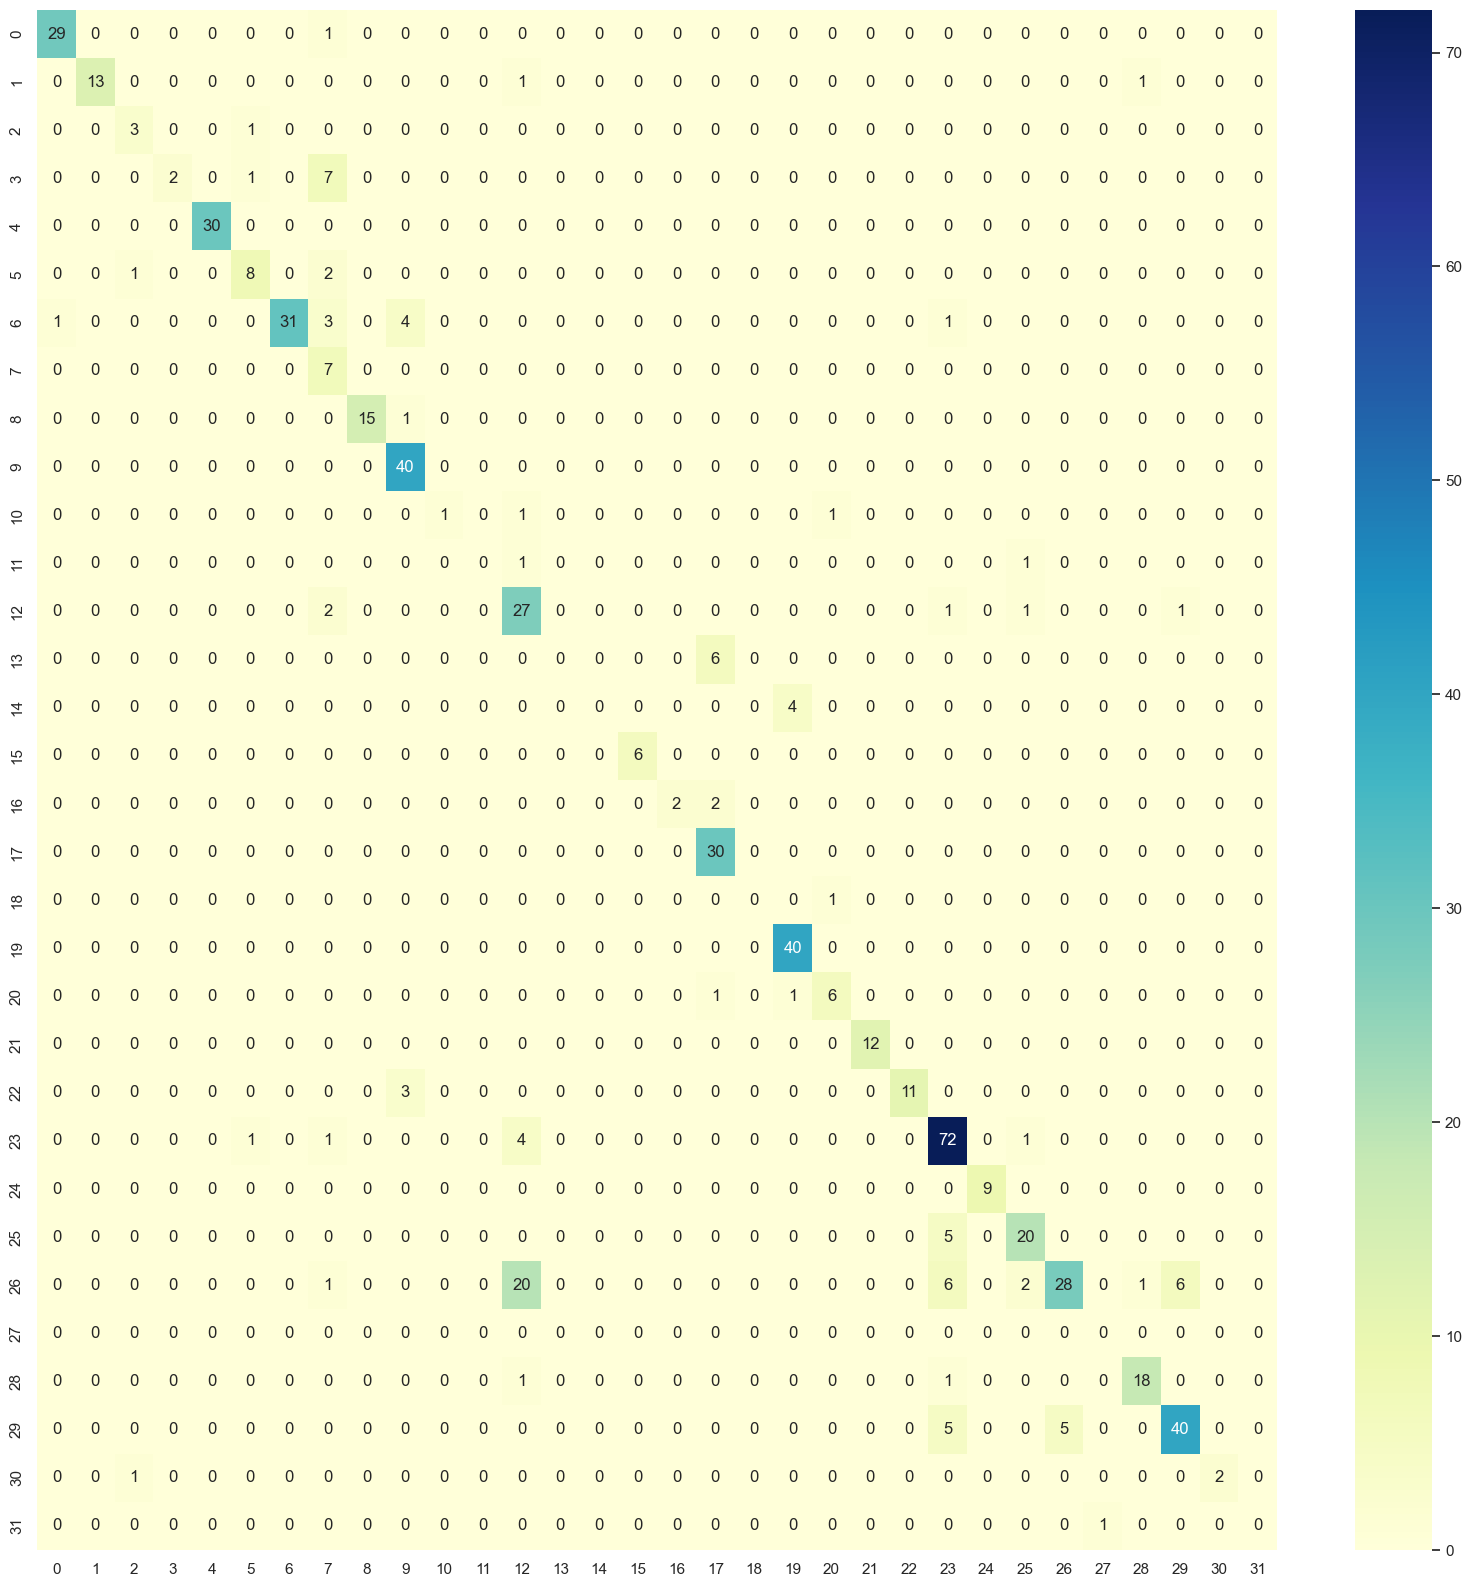

In [74]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(val_generator.classes, predictions.argmax(axis=1))
plt.figure(figsize=(20,20))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [75]:
Ann_loss,Ann_acc=Ann_model.evaluate(val_generator)
print("ANN Validation:", Ann_loss, Ann_acc)

39/39 [==============================] - 7s 173ms/step - loss: 0.5645 - accuracy: 0.8149
ANN Validation: 0.5645303726196289 0.8149350881576538


# Comparison Between The Two Algorithms

In [76]:
print("ANN vs CNN Performance Comparison:")
print("ANN Validation Accuracy:", Ann_acc)
print("CNN Validation Accuracy:", Cnn_acc)

ANN vs CNN Performance Comparison:
ANN Validation Accuracy: 0.8149350881576538
CNN Validation Accuracy: 0.9350649118423462
